In [2]:
import numpy as np
# from helpers import get_data
# from constants_v1 import *
# Plotting
import pandas as pd
from helpers_pd import *
pd.options.mode.chained_assignment = None  # default='warn'
import seaborn as sns
# plt.style.use('seaborn-white')
import matplotlib.pyplot as plt

In [24]:
df1 = get_data(gen="Gen1")
df3 = get_data(gen="Gen3")
df4 = get_data(gen="Gen4")
df6 = get_data(gen="Gen6")
# df9 = get_data(gen="Gen9")
# df['K_d'] = df.loc[:, 'k_oc'] * df.loc[:,'f_oc']
df1["Gen"] = "Gen1"
df3["Gen"] = "Gen3"
df4["Gen"] = "Gen4"
df6["Gen"] = "Gen6"
# df9["Gen"] = "Gen9"
df = pd.concat([df1, df3, df4, df6])
# df = df9
# Index names
df['Name'] = df['Gen'] + "/" + df.index
df = df.set_index('Name')

In [25]:
# list(df)

In [26]:
# For later, 'KGE-d13C_out', 'NSE-d13C_out'
dfs = df[['Model', 'Gen',
          'z3_factor',
          'cZ0Z1',
          'cZ',
          'c_adr',
          'k_g',
          'gamma01',
          'gammaZ',
          'f_transp',
          'f_oc',
          'k_oc',
          'beta_runoff',
          'dt_50_aged',
          'dt_50_ab',
          'dt_50_ref',
          'epsilon_iso',
          'beta_moisture',
          'KGE-CONC-tra', 'KGE-d13C-tra',
          'KGE-CONC-det', 'KGE-d13C-det',
          'KGE-CONC-blk', 'KGE-d13C-blk',
          'MAE-CONC-tra', 'MAE-d13C-tra',
          'BIAS-CONC-tra', 'BIAS-d13C-tra',
          'NSE-CONC-tra', 'NSE-d13C-tra',
          'KGE-CONC_out', 'KGE-d13C_out'
          ]]

In [27]:
dfs['KGE-SM'] = (dfs.loc[:, 'KGE-CONC_out'] + dfs.loc[:, 'KGE-CONC-blk'])/2.0  
dfs['KGE-d13C'] = (dfs.loc[:, 'KGE-d13C_out'] + dfs.loc[:, 'KGE-d13C-blk'])/2.0
# dfs['KGE-CONC_out'].max()
# dfs['NSE-Q_out' ].max()
# dfs['BIAS-CONC_out'].min()
# dfs['BIAS-LDS_out'].min()
dfs['BIAS-d13C-tra'].max()
dfs['NSE-CONC-tra'].max()

0.659940766030521

In [28]:
# ff_out = dfs.loc[(dfs['BIAS-LDS_out'] < 100)] # & (dfs['KGE-LDS_out'] > 0) ]
ff_out = dfs.loc[(dfs['KGE-CONC-blk'] > 0.7) & (dfs['KGE-d13C-blk'] > .6) 
#                  & (dfs['KGE-SM'] > 0) & (dfs['KGE-d13C'] > 0) 
                ]

ff_c = dfs.loc[(dfs['KGE-SM'] > 0.46) & (dfs['KGE-d13C'] >  0.46)] # Gen6
# ff_c = dfs.loc[(dfs['KGE-SM'] > 0.30) & (dfs['KGE-d13C'] >  0.30)] # Gen9
# ff_out = dfs.loc[(dfs['NSE-Q_out'] > 0.54)] # & (dfs['KGE-LDS_out'] > 0) ]
# ff_out = dfs
print(len(ff_out), len(ff_c))


(727, 63)


In [29]:
ff_out.head()

,Model,Gen,z3_factor,cZ0Z1,cZ,c_adr,k_g,gamma01,gammaZ,f_transp,...,MAE-CONC-tra,MAE-d13C-tra,BIAS-CONC-tra,BIAS-d13C-tra,NSE-CONC-tra,NSE-d13C-tra,KGE-CONC_out,KGE-d13C_out,KGE-SM,KGE-d13C
Name,,,,,,,,,,,,,,,,,,,,,
Gen1/LHS_be1var5/1/,var,Gen1,0.978911,0.849646,0.420030,0.514180,1833.371056,0.975506,0.426317,0.546232,...,0.856858,0.643463,-10.699692,-1.594227,0.468873,0.413097,-0.561014,-3.435979,0.088000,-1.317513
Gen1/LHS_be1var5/16/,var,Gen1,0.915509,0.712734,0.510952,0.511617,1586.657805,0.834731,0.014978,0.487512,...,0.874782,1.266606,2.317203,-4.066442,0.461049,-0.989860,-0.546529,-1.866478,0.084851,-0.621579
Gen1/LHS_be1var5/26/,var,Gen1,0.879579,0.875411,0.599392,0.148855,3136.825021,0.916746,0.489028,0.397863,...,0.879976,0.510202,2.980189,1.322687,0.458483,0.670350,-0.577451,-2.569821,0.062207,-0.958738
Gen1/LHS_be1var6/10/,var,Gen1,0.869449,0.894351,0.647901,0.233735,2348.197741,0.640765,0.101388,0.561664,...,0.911617,1.038585,-10.566524,-3.220285,0.444124,-0.445682,-21.835252,-0.154166,-10.563513,0.284664
Gen1/LHS_be1var6/104/,var,Gen1,0.965850,0.928111,0.265385,0.299363,2212.940341,0.540901,0.189754,0.658433,...,0.879616,1.069247,2.159471,-3.389579,0.458304,-0.496099,-0.530293,0.247169,0.091423,0.470349


In [30]:
# ff_out['IsoCstr'] = ff_out.apply(IsoKGEout, args=(0.2,), axis=1)

In [31]:
# , 'IsoCstr'
dm_simp = pd.melt(ff_c, 
                 id_vars=['KGE-SM', 'KGE-d13C',
                          'KGE-d13C-det', 'KGE-CONC-det', 
                          'KGE-d13C-tra', 'KGE-CONC-tra', 
                          'KGE-d13C-blk', 'KGE-CONC-blk', 
#                           'NSE-d13C-blk', 'NSE-CONC-blk',
                          'BIAS-CONC-tra', 'BIAS-d13C-tra', 'MAE-d13C-tra', 'Gen', 'Model'],
             value_vars=['z3_factor',
                         'cZ0Z1',
                         'cZ',
                         'c_adr',
                         'k_g',
                         'gamma01',
                         'gammaZ',
                         'f_transp',
                         'f_oc',
                         'k_oc',
                         'beta_runoff',
                         'dt_50_aged',
                         'dt_50_ab',
                         'dt_50_ref',
                         'epsilon_iso',
                         'beta_moisture'])

In [32]:
dm_simp.head()

,KGE-SM,KGE-d13C,KGE-d13C-det,KGE-CONC-det,KGE-d13C-tra,KGE-CONC-tra,KGE-d13C-blk,KGE-CONC-blk,BIAS-CONC-tra,BIAS-d13C-tra,MAE-d13C-tra,Gen,Model,variable,value
0,0.485442,0.546703,-0.048094,0.664911,0.735508,0.687348,0.819713,0.691184,2.764758,-1.162591,0.551968,Gen1,var,z3_factor,0.914005
1,0.471657,0.498759,0.571870,0.632014,0.830842,0.655118,0.735603,0.669316,12.147991,1.350683,0.503597,Gen1,var,z3_factor,0.968904
2,0.505427,0.527997,0.131356,0.850306,0.559030,0.766587,0.852112,0.731888,12.814185,-1.826019,0.739255,Gen3,fix,z3_factor,0.973561
3,0.472537,0.485114,0.833996,0.882549,0.740036,0.801552,0.589552,0.774476,2.923459,2.400842,0.788010,Gen3,fix,z3_factor,0.932009
4,0.465707,0.613335,0.402485,0.738830,0.739755,0.623136,0.924356,0.599522,31.630506,-0.713871,0.554404,Gen3,fix,z3_factor,0.860250


## Overall

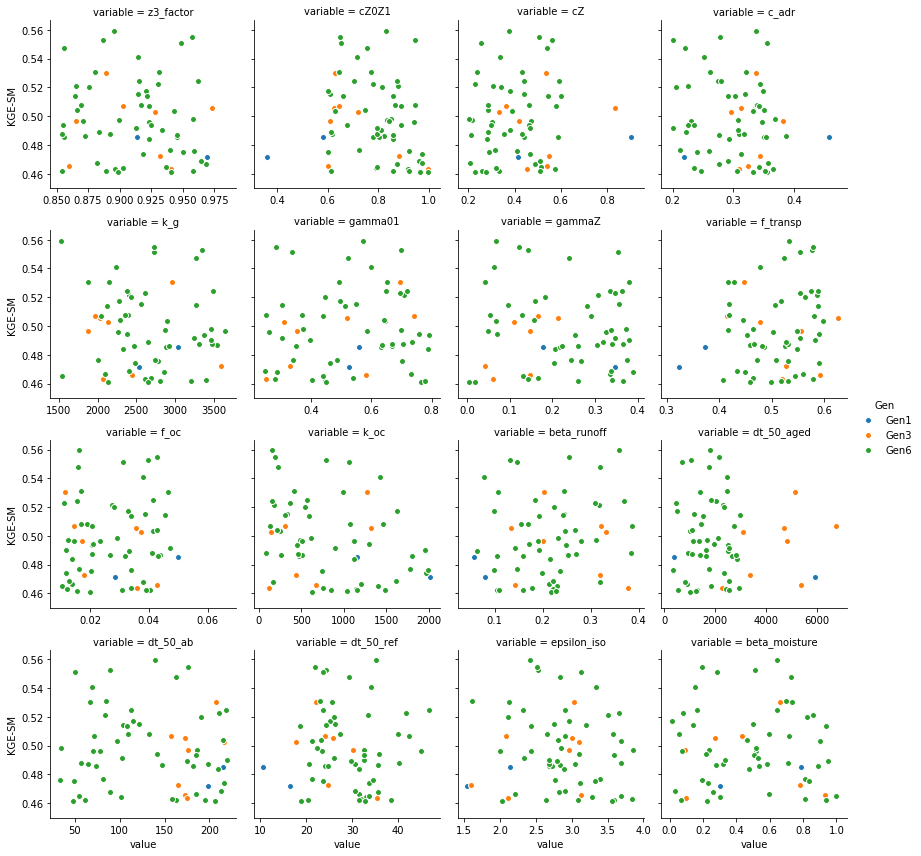

In [33]:
g = sns.FacetGrid(dm_simp, col="variable", hue="Gen", col_wrap=4, sharex=False)
g = g.map(plt.scatter, "value", "KGE-SM", edgecolor="w").add_legend()

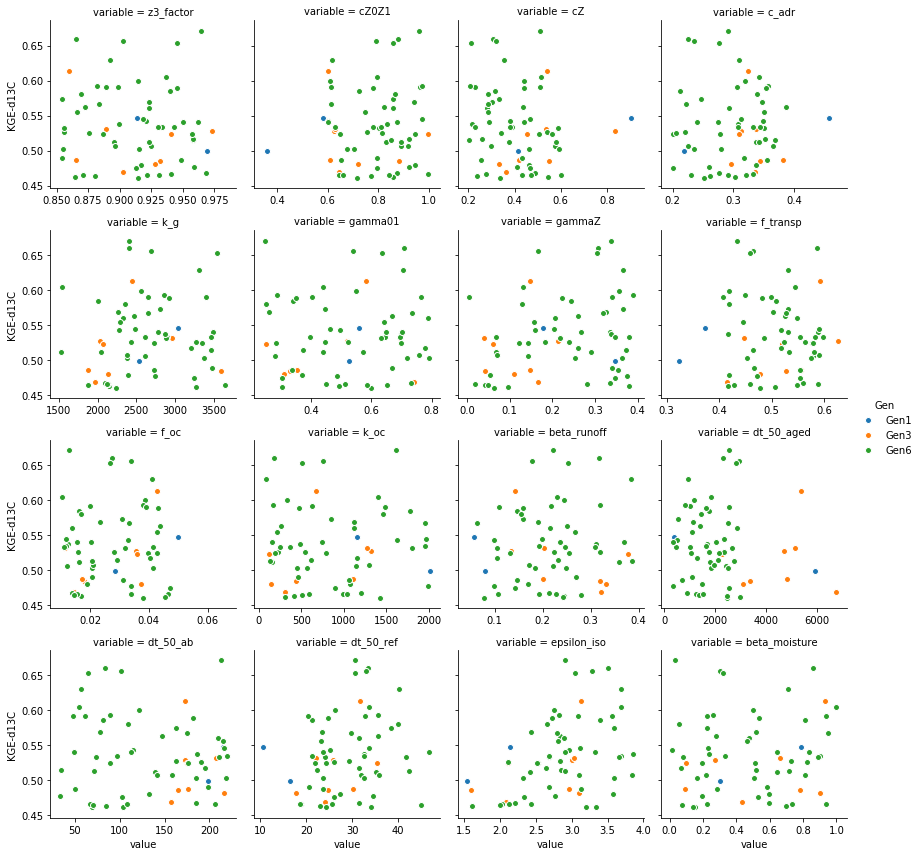

In [34]:
g = sns.FacetGrid(dm_simp, col="variable", hue="Gen", col_wrap=4, sharex=False)
g = g.map(plt.scatter, "value", "KGE-d13C", edgecolor="w").add_legend()

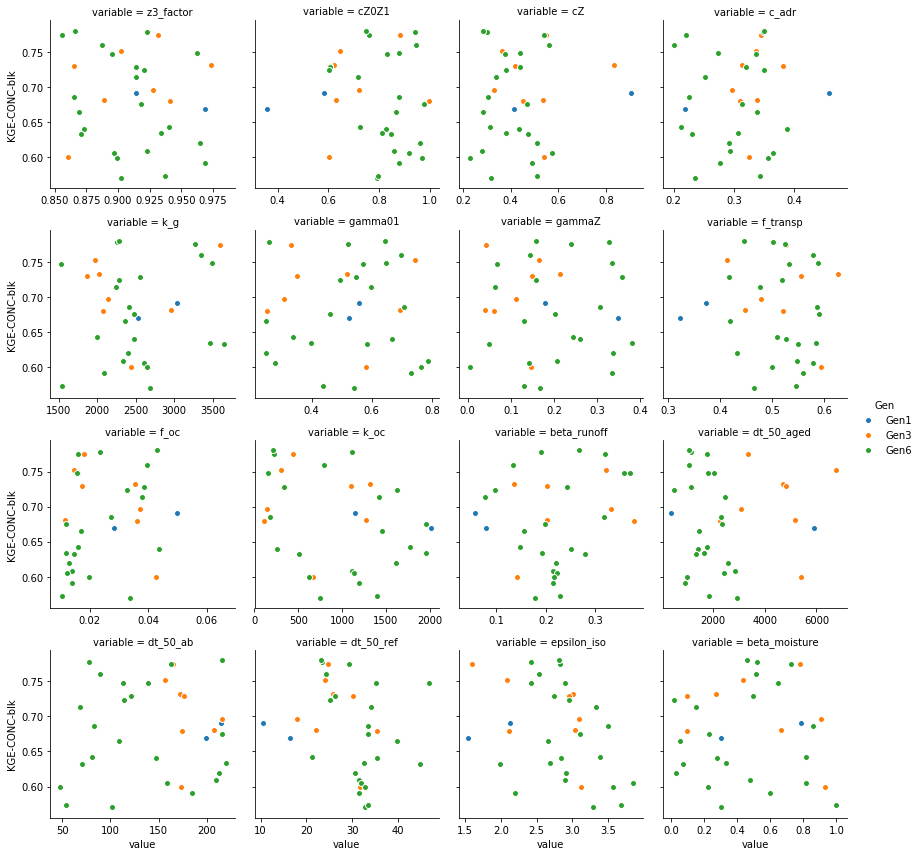

In [21]:
g = sns.FacetGrid(dm_simp, col="variable", hue="Gen", col_wrap=4, sharex=False)
g = g.map(plt.scatter, "value", "KGE-CONC-blk", edgecolor="w").add_legend()

In [31]:
k_age = np.log(2)/5.
avail = np.exp(-k_age)
avail

0.8705505632961241

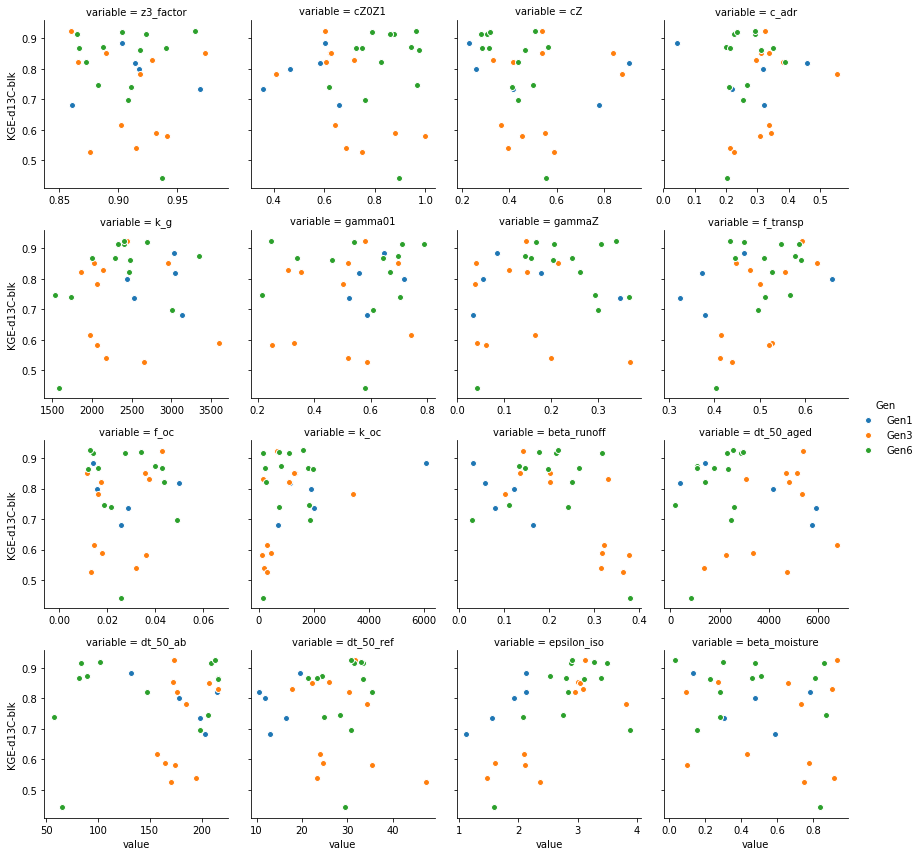

In [38]:
g = sns.FacetGrid(dm_simp, col="variable", hue="Gen", col_wrap=4, sharex=False)
g = g.map(plt.scatter, "value", "KGE-d13C-blk", edgecolor="w").add_legend()

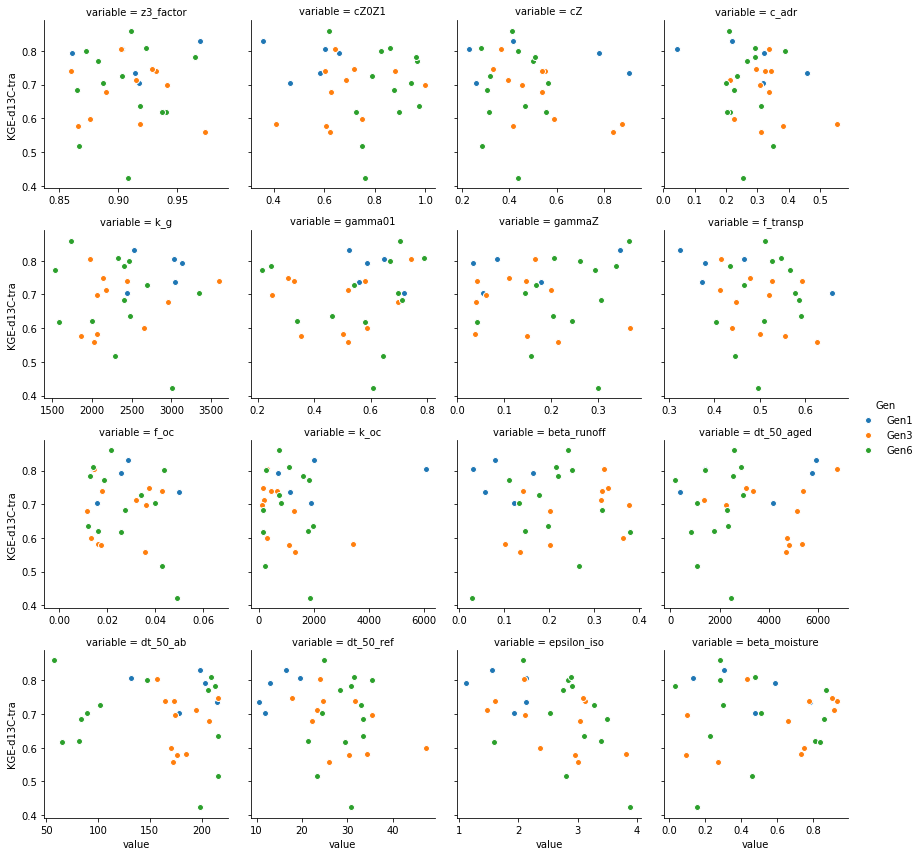

In [39]:
g = sns.FacetGrid(dm_simp, col="variable", hue="Gen", col_wrap=4, sharex=False)
g = g.map(plt.scatter, "value", "KGE-d13C-tra", edgecolor="w").add_legend()

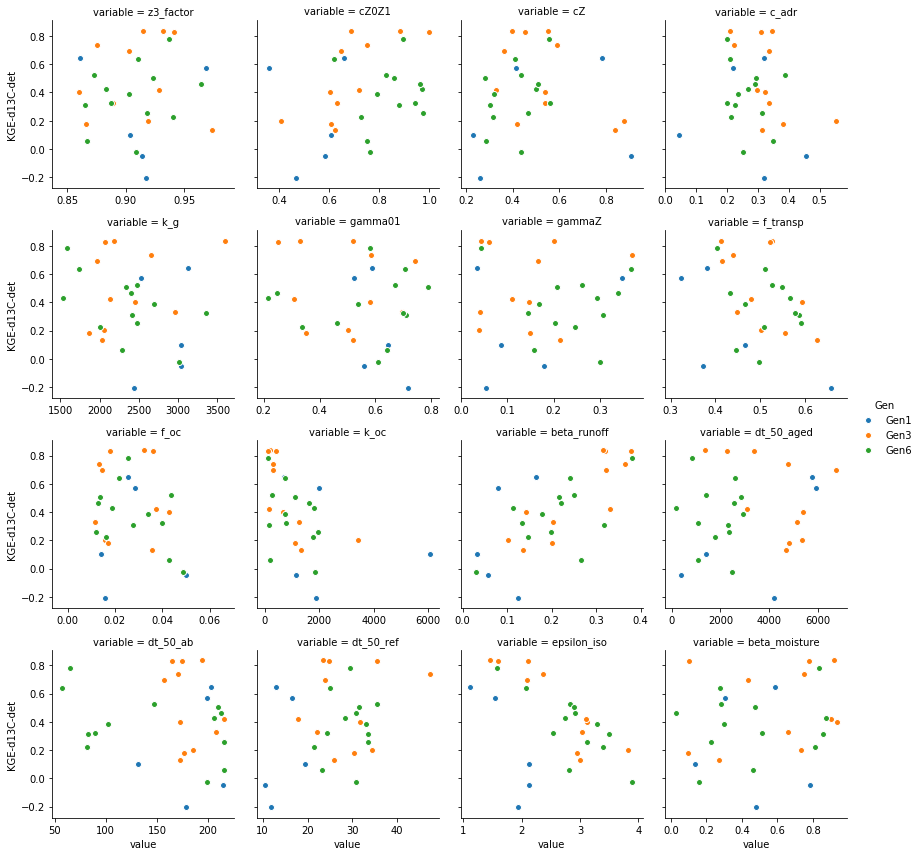

In [40]:
g = sns.FacetGrid(dm_simp, col="variable", hue="Gen", col_wrap=4, sharex=False)
g = g.map(plt.scatter, "value", "KGE-d13C-det", edgecolor="w").add_legend()

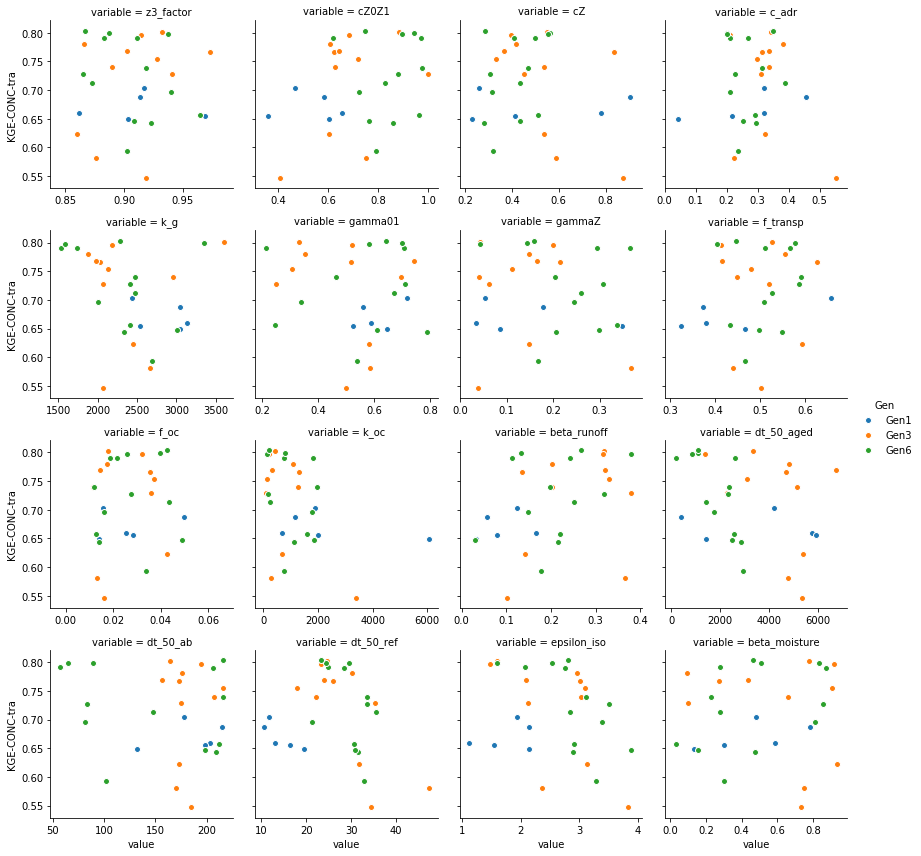

In [41]:
g = sns.FacetGrid(dm_simp, col="variable", hue="Gen", col_wrap=4, sharex=False)
g = g.map(plt.scatter, "value", "KGE-CONC-tra", edgecolor="w").add_legend()

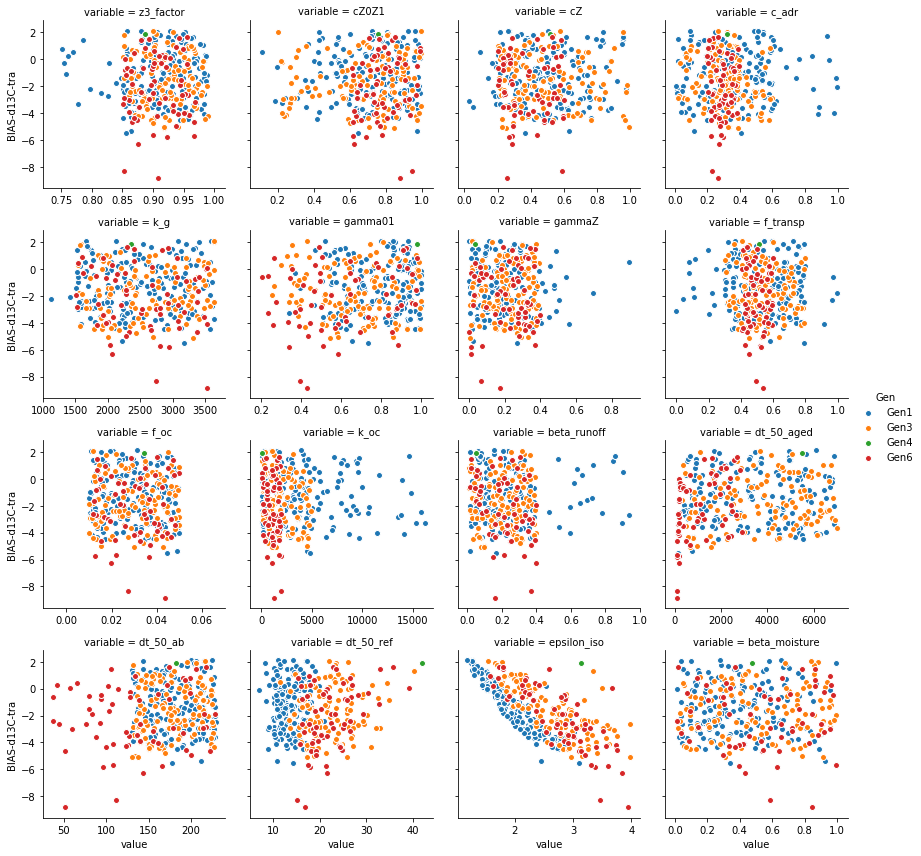

In [36]:
g = sns.FacetGrid(dm_simp, col="variable", hue="Gen", col_wrap=4, sharex=False)
g = g.map(plt.scatter, "value", "BIAS-d13C-tra", edgecolor="w").add_legend()

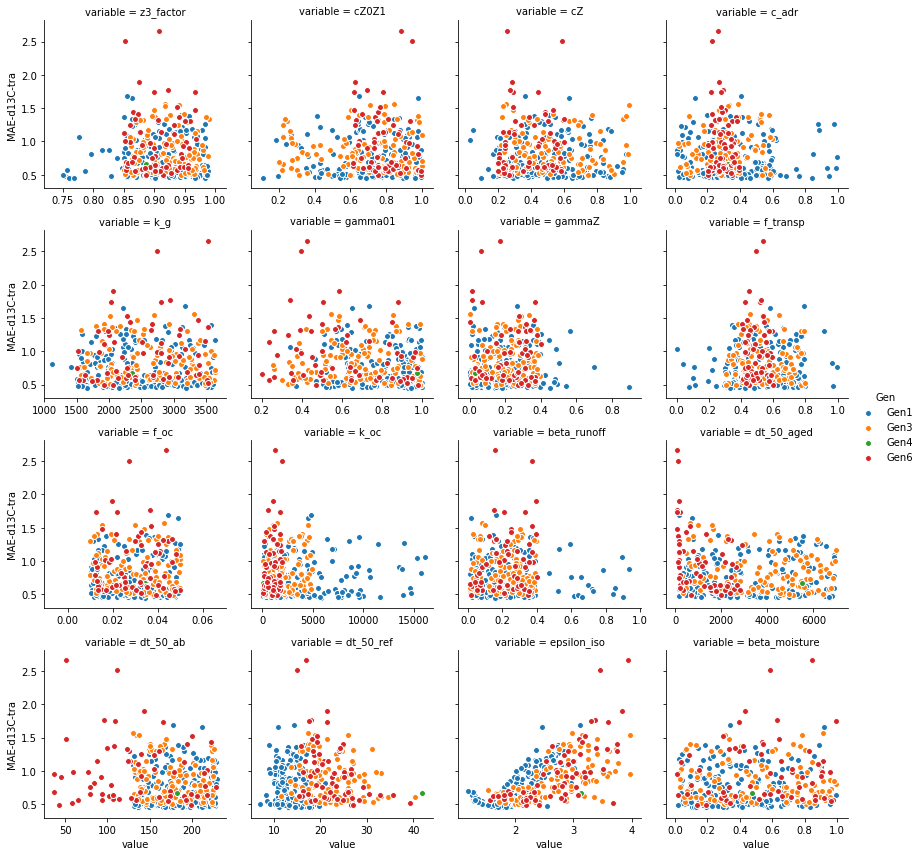

In [37]:
g = sns.FacetGrid(dm_simp, col="variable", hue="Gen", col_wrap=4, sharex=False)
g = g.map(plt.scatter, "value", "MAE-d13C-tra", edgecolor="w").add_legend()

In [21]:
# g = sns.FacetGrid(dm_simp, col="variable", hue="Gen", col_wrap=4, sharex=False)
# g = g.map(plt.scatter, "value", "BIAS-Q_out", edgecolor="w").add_legend()